In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist import SubplotZero
# Create the cartesian axis


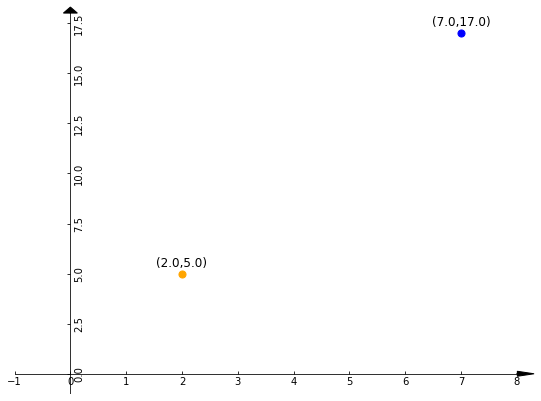

In [2]:
class Axes():
    
    def __init__(self, xlim=(-5,5), ylim=(-5,5), figsize=(12,5)):
        self.xlim = xlim
        self.ylim = ylim
        self.figsize  = figsize
        self.points   = []
        self.segments = []
        self.vectors  = []
        self.lines    = []
        self.scale_arrows()
    def __arrow__(self, x, y, dx, dy, width, length):
        plt.arrow(
            x, y, dx, dy, 
            color       = 'k',
            clip_on     = False, 
            head_width  = self.head_width, 
            head_length = self.head_length
        ) 
        
    def __drawAxis__(self):
        """
        Draws the 2D cartesian axis
        """
        # A subplot with two additional axis, "xzero" and "yzero"
        # corresponding to the cartesian axis
        ax = SubplotZero(self.fig, 1, 1, 1)
        self.fig.add_subplot(ax)
        
        # make xzero axis (horizontal axis line through y=0) visible.
        for axis in ["xzero","yzero"]:
            ax.axis[axis].set_visible(True)
        # make the other axis (left, bottom, top, right) invisible
        for n in ["left", "right", "bottom", "top"]:
            ax.axis[n].set_visible(False)
            
        # Plot limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        # Draw the arrows
        self.__arrow__(self.xlim[1], 0, 0.01, 0, 0.3, 0.2) # x-axis arrow
        self.__arrow__(0, self.ylim[1], 0, 0.01, 0.2, 0.3) # y-axis arrow
        
        
    def scale_arrows(self):
        """ Make the arrows look good regardless of the axis limits """
        xrange = self.xlim[1] - self.xlim[0]
        yrange = self.ylim[1] - self.ylim[0]
        
        self.head_width  = min(xrange/30, 0.25)
        self.head_length = min(yrange/30, 0.3)
        
        
    def draw(self, image=None):
        self.scale_arrows()
        self.fig = plt.figure(figsize=self.figsize)
        # First draw the axis
        self.__drawAxis__()
        # Plot each point
        for point in self.points:
            point.draw()
        # Save the image?
        if image:
            plt.savefig(image)
        plt.show()
        
    def addPoints(self, points):
        for p in points:
            self.addPoint(p)
            
    def addPoint(self, p):
        self.points.append(p)
class Point():
    
    def __init__(self, x, y, color='#4ca3dd', size=50, add_coordinates=True):
        self.x = x
        self.y = y
        self.color = color
        self.size  = size
        self.add_coordinates = add_coordinates
        self.y_offset = 0.2
        self.items = np.array([x,y])
        self.len = 2
        
    def __getitem__(self, index):
        return self.items[index]
    
    def __str__(self):
        return "Point(%.2f,%.2f)" % (self.x, self.y)
    
    def __repr__(self):
        return "Point(%.2f,%.2f)" % (self.x, self.y)
    
    def __len__(self):
        return self.len
    
    def draw(self):
        plt.scatter([self.x], [self.y], color=self.color, s=self.size)
        
        # Add the coordinates if asked by user
        if self.add_coordinates:
            plt.text(
                self.x, self.y + self.y_offset,
                "(%.1f,%.1f)"%(self.x,self.y),
                horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=12
            )
            
axes = Axes(xlim=(-1,8), ylim=(-1,18), figsize=(9,7))
# Create two points
p1 = Point(2,  5, color='#ffa500')
p2 = Point(7, 17, color='#0000ff')
axes.addPoints([p1, p2])
axes.draw()

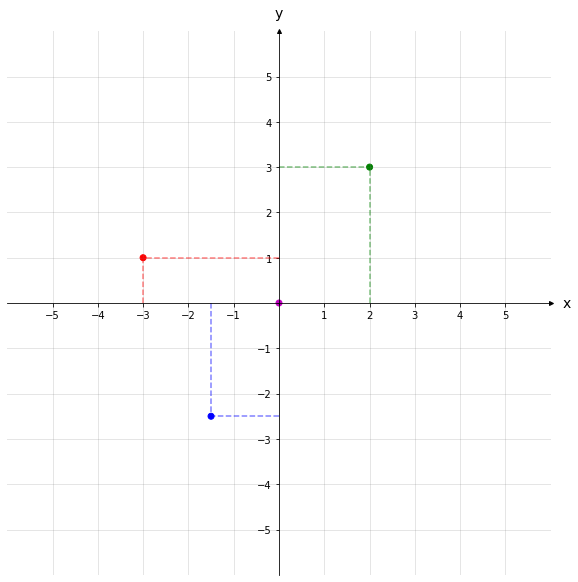

In [3]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = [0, 2, -3, -1.5]
ys = [0, 3, 1, -2.5]
 

colors = ['m', 'g', 'r', 'b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys, c=colors)
 

# Draw lines connecting points to axes
for x, y, c in zip(xs, ys, colors): 
    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()